### Time-Series Forecasting Of Covid-19 Cases In RUSSIA (CNN+ LSTM)

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv('RUSSIA.csv')

In [10]:
df.head()

,Date,Total,Daily Cases,Total Deaths,Daily Deaths
0,01-02-2020,2,2,0,0
1,02-02-2020,2,0,0,0
2,03-02-2020,2,0,0,0
3,04-02-2020,2,0,0,0
4,05-02-2020,2,0,0,0


In [11]:
df.tail()

,Date,Total,Daily Cases,Total Deaths,Daily Deaths
187,06-08-2020,871894,4551,14606,74
188,07-08-2020,877135,5241,14725,119
189,08-08-2020,882347,5212,14854,129
190,09-08-2020,887536,5189,14931,77
191,10-08-2020,892654,5118,15001,70


In [12]:
df1=df.reset_index()["Total"]

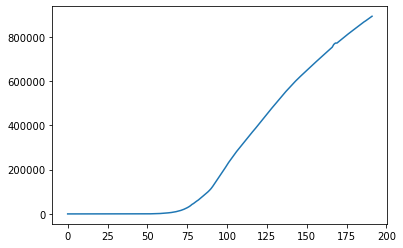

In [13]:
plt.plot(df1)

In [14]:
df1

0           2
1           2
2           2
3           2
4           2
        ...  
187    871894
188    877135
189    882347
190    887536
191    892654
Name: Total, Length: 192, dtype: int64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)

[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.12025739e-06]
 [2.24051478e-06]
 [2.24051478e-06]
 [2.24051478e-06]
 [8.96205912e-06]
 [8.96205912e-06]
 [8.96205912e-06]
 [8.96205912e-06]
 [8.96205912e-06]
 [2.57659200e-05]
 [3.13672069e-05]
 [4.81710678e-05]
 [6.38546712e-05]
 [6.83357008e-05]
 [1.01943423e-04]
 [1.25468828e-04]
 [1.62437322e-04]
 [2.20690706e-04]
 [2.81184605e-04]
 [3.40558247e-04]
 [4.88432222e-04]
 [4.88432222e-04]
 [5.52286893e-04]
 [7.34888848e-04]
 [9.38775693e-04]
 [1.158346

In [17]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(134, 58)

In [19]:
train_data

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.12025739e-06],
       [2.24051478e-06],
       [2.24051478e-06],
       [2.24051478e-06],
       [8.96205912e-06],
       [8.96205912e-06],
       [8.96205912e-06],
       [8.96205912e-06],
       [8.96205912e-06],
       [2.57659200e-05],


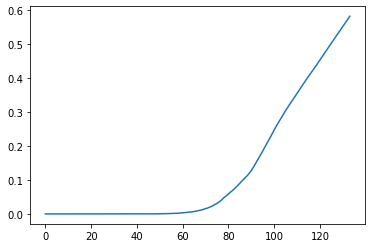

In [20]:
plt.plot(train_data)

In [21]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [22]:
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [23]:
print(X_train.shape), print(y_train.shape)

(83, 50)
(83,)


(None, None)

In [24]:
print(X_test.shape), print(ytest.shape)

(7, 50)
(7,)


(None, None)

In [25]:
X_train =X_train.reshape(X_train.shape[0],1,X_train.shape[1],1 )
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1],1 )

In [26]:
X_train.shape[1]

1

In [27]:
X_train.shape

(83, 1, 50, 1)

In [28]:
X_train.shape

(83, 1, 50, 1)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten

In [40]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu',padding='same'),input_shape=(None,50,1)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(128))
model.add(Dense(units=25))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_6 (TimeDist (None, None, 50, 128)     256       
_________________________________________________________________
time_distributed_7 (TimeDist (None, None, 25, 128)     0         
_________________________________________________________________
time_distributed_8 (TimeDist (None, None, 3200)        0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               1704448   
_________________________________________________________________
dense_4 (Dense)              (None, 25)                3225      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 1,707,955
Trainable params: 1,707,955
Non-trainable params: 0
____________________________________________

In [42]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=300,batch_size=1,verbose=1)

Epoch 1/300
83/83 [==============================] - 2s 19ms/step - loss: 0.0047 - val_loss: 0.1874
Epoch 2/300
83/83 [==============================] - 1s 13ms/step - loss: 0.0021 - val_loss: 0.2093
Epoch 3/300
83/83 [==============================] - 1s 12ms/step - loss: 3.9694e-04 - val_loss: 0.0941
Epoch 4/300
83/83 [==============================] - 1s 12ms/step - loss: 0.0015 - val_loss: 0.4508
Epoch 5/300
83/83 [==============================] - 1s 12ms/step - loss: 8.5525e-04 - val_loss: 0.2185
Epoch 6/300
83/83 [==============================] - 1s 12ms/step - loss: 3.7308e-04 - val_loss: 0.2257
Epoch 7/300
83/83 [==============================] - 1s 12ms/step - loss: 8.7619e-04 - val_loss: 0.0570
Epoch 8/300
83/83 [==============================] - 1s 12ms/step - loss: 2.6991e-04 - val_loss: 0.0961
Epoch 9/300
83/83 [==============================] - 1s 12ms/step - loss: 3.3199e-04 - val_loss: 0.0787
Epoch 10/300
83/83 [==============================] - 1s 12ms/step - loss: 5

Epoch 79/300
83/83 [==============================] - 1s 11ms/step - loss: 1.5806e-05 - val_loss: 0.0431
Epoch 80/300
83/83 [==============================] - 1s 12ms/step - loss: 1.0147e-04 - val_loss: 0.0223
Epoch 81/300
83/83 [==============================] - 1s 12ms/step - loss: 3.8280e-05 - val_loss: 0.0333
Epoch 82/300
83/83 [==============================] - 1s 11ms/step - loss: 3.3904e-05 - val_loss: 0.0174
Epoch 83/300
83/83 [==============================] - 1s 12ms/step - loss: 2.1572e-05 - val_loss: 0.0216
Epoch 84/300
83/83 [==============================] - 1s 11ms/step - loss: 2.2718e-05 - val_loss: 0.0227
Epoch 85/300
83/83 [==============================] - 1s 12ms/step - loss: 7.9898e-05 - val_loss: 0.0082
Epoch 86/300
83/83 [==============================] - 1s 12ms/step - loss: 6.7484e-05 - val_loss: 0.0175
Epoch 87/300
83/83 [==============================] - 1s 12ms/step - loss: 1.3933e-05 - val_loss: 0.0147
Epoch 88/300
83/83 [==============================] - 1

83/83 [==============================] - 1s 12ms/step - loss: 1.3115e-05 - val_loss: 0.0233
Epoch 157/300
83/83 [==============================] - 1s 12ms/step - loss: 3.5638e-05 - val_loss: 0.0165
Epoch 158/300
83/83 [==============================] - 1s 12ms/step - loss: 3.9097e-05 - val_loss: 0.0293
Epoch 159/300
83/83 [==============================] - 1s 11ms/step - loss: 1.4250e-05 - val_loss: 0.0212
Epoch 160/300
83/83 [==============================] - 1s 12ms/step - loss: 5.9316e-06 - val_loss: 0.0191
Epoch 161/300
83/83 [==============================] - 1s 12ms/step - loss: 1.0989e-05 - val_loss: 0.0245
Epoch 162/300
83/83 [==============================] - ETA: 0s - loss: 3.0922e-0 - 1s 12ms/step - loss: 3.0157e-05 - val_loss: 0.0182
Epoch 163/300
83/83 [==============================] - 1s 12ms/step - loss: 1.8924e-05 - val_loss: 0.0173
Epoch 164/300
83/83 [==============================] - 1s 12ms/step - loss: 8.9820e-05 - val_loss: 0.0255
Epoch 165/300
83/83 [===========

83/83 [==============================] - 1s 12ms/step - loss: 1.7418e-06 - val_loss: 0.0244
Epoch 233/300
83/83 [==============================] - 1s 12ms/step - loss: 6.7825e-06 - val_loss: 0.0261
Epoch 234/300
83/83 [==============================] - 1s 12ms/step - loss: 1.0906e-05 - val_loss: 0.0253
Epoch 235/300
83/83 [==============================] - 1s 12ms/step - loss: 6.9761e-06 - val_loss: 0.0242
Epoch 236/300
83/83 [==============================] - 1s 12ms/step - loss: 2.0132e-06 - val_loss: 0.0237
Epoch 237/300
83/83 [==============================] - 1s 12ms/step - loss: 2.2934e-06 - val_loss: 0.0231e-
Epoch 238/300
83/83 [==============================] - 1s 12ms/step - loss: 2.3935e-06 - val_loss: 0.0241
Epoch 239/300
83/83 [==============================] - 1s 12ms/step - loss: 8.4604e-06 - val_loss: 0.0206
Epoch 240/300
83/83 [==============================] - 1s 12ms/step - loss: 9.1386e-06 - val_loss: 0.0243
Epoch 241/300
83/83 [==============================] - 1s 

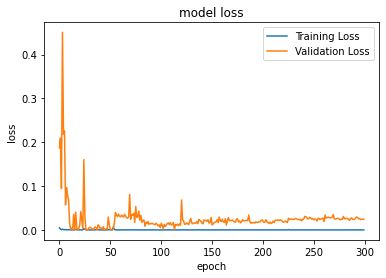

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [35]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

Training RMSE

In [36]:

import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.0017995526643454982

Validation RMSE

In [37]:

math.sqrt(mean_squared_error(ytest,test_predict))

0.1688708262043706

Training MEA

In [38]:
mean_absolute_error(y_train,train_predict)

0.0013776475668317485

Validation MEA

In [651]:
mean_absolute_error(ytest,test_predict)

0.11383326567569423

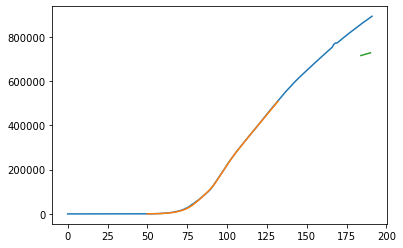

In [39]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
look_back=50
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [174]:
len(test_data)

66

In [175]:
x_input=test_data[16:].reshape(1,-1)
x_input.shape


(1, 50)

In [176]:
x_input

array([[0.34866944, 0.36037127, 0.36626472, 0.3734993 , 0.38681129,
        0.40123351, 0.41456137, 0.4303794 , 0.44344058, 0.45372804,
        0.46184702, 0.47327205, 0.48904012, 0.50527842, 0.51953118,
        0.53233245, 0.54112621, 0.54795469, 0.56324782, 0.57829318,
        0.59267962, 0.60788599, 0.62105857, 0.62944051, 0.63628824,
        0.65041746, 0.66389418, 0.67922039, 0.69075715, 0.7003884 ,
        0.70833083, 0.71516877, 0.7290114 , 0.75191818, 0.77215858,
        0.79102511, 0.80829026, 0.81658679, 0.82444652, 0.83822434,
        0.86154092, 0.88106434, 0.89874671, 0.9140692 , 0.92277823,
        0.92839556, 0.94581464, 0.96510683, 0.98304439, 1.        ]])

In [177]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [178]:
temp_input

[0.3486694423046932,
 0.3603712747793881,
 0.3662647234950085,
 0.3734992955136337,
 0.38681128609437754,
 0.4012335093817871,
 0.41456136525204546,
 0.43037939645738216,
 0.4434405804400559,
 0.45372803923249805,
 0.4618470167517204,
 0.4732720505582894,
 0.4890401229796229,
 0.5052784155774189,
 0.5195311840704392,
 0.5323324473525558,
 0.5411262060151726,
 0.5479546941340961,
 0.5632478205480479,
 0.5782931783980919,
 0.5926796203942558,
 0.6078859940549047,
 0.6210585726235316,
 0.6294405088774734,
 0.6362882378794251,
 0.650417459649843,
 0.6638941791940568,
 0.679220386424443,
 0.6907571523763166,
 0.7003883957896897,
 0.708330829768144,
 0.715168769548906,
 0.7290114034300081,
 0.7519181810141768,
 0.7721585772818506,
 0.7910251069894364,
 0.808290255134109,
 0.8165867888721535,
 0.8244465208095214,
 0.8382243432951599,
 0.8615409179318954,
 0.881064338137253,
 0.8987467096402225,
 0.9140692037177437,
 0.9227782349831659,
 0.9283955601493633,
 0.9458146353582619,
 0.965106827407

In [179]:
from numpy import array

lst_output=[]
n_steps=50
i=0
while(i<180):
    
    if(len(temp_input)>50):
        
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.0048529]
51
1 day input [0.36037127 0.36626472 0.3734993  0.38681129 0.40123351 0.41456137
 0.4303794  0.44344058 0.45372804 0.46184702 0.47327205 0.48904012
 0.50527842 0.51953118 0.53233245 0.54112621 0.54795469 0.56324782
 0.57829318 0.59267962 0.60788599 0.62105857 0.62944051 0.63628824
 0.65041746 0.66389418 0.67922039 0.69075715 0.7003884  0.70833083
 0.71516877 0.7290114  0.75191818 0.77215858 0.79102511 0.80829026
 0.81658679 0.82444652 0.83822434 0.86154092 0.88106434 0.89874671
 0.9140692  0.92277823 0.92839556 0.94581464 0.96510683 0.98304439
 1.         1.00485289]
1 day output [[1.0049416]]
2 day input [0.36626472 0.3734993  0.38681129 0.40123351 0.41456137 0.4303794
 0.44344058 0.45372804 0.46184702 0.47327205 0.48904012 0.50527842
 0.51953118 0.53233245 0.54112621 0.54795469 0.56324782 0.57829318
 0.59267962 0.60788599 0.62105857 0.62944051 0.63628824 0.65041746
 0.66389418 0.67922039 0.69075715 0.7003884  0.70833083 0.71516877
 0.7290114  0.75191818 0.77215858 0.7910

17 day output [[1.0810813]]
18 day input [0.56324782 0.57829318 0.59267962 0.60788599 0.62105857 0.62944051
 0.63628824 0.65041746 0.66389418 0.67922039 0.69075715 0.7003884
 0.70833083 0.71516877 0.7290114  0.75191818 0.77215858 0.79102511
 0.80829026 0.81658679 0.82444652 0.83822434 0.86154092 0.88106434
 0.89874671 0.9140692  0.92277823 0.92839556 0.94581464 0.96510683
 0.98304439 1.         1.00485289 1.00494158 1.00727165 1.01596534
 1.02684438 1.03506839 1.03968203 1.0427382  1.04631877 1.05090797
 1.05580616 1.06027722 1.06415617 1.06769836 1.07116473 1.07460988
 1.07794356 1.08108127]
18 day output [[1.0840166]]
19 day input [0.57829318 0.59267962 0.60788599 0.62105857 0.62944051 0.63628824
 0.65041746 0.66389418 0.67922039 0.69075715 0.7003884  0.70833083
 0.71516877 0.7290114  0.75191818 0.77215858 0.79102511 0.80829026
 0.81658679 0.82444652 0.83822434 0.86154092 0.88106434 0.89874671
 0.9140692  0.92277823 0.92839556 0.94581464 0.96510683 0.98304439
 1.         1.00485289 1

32 day output [[1.1128788]]
33 day input [0.75191818 0.77215858 0.79102511 0.80829026 0.81658679 0.82444652
 0.83822434 0.86154092 0.88106434 0.89874671 0.9140692  0.92277823
 0.92839556 0.94581464 0.96510683 0.98304439 1.         1.00485289
 1.00494158 1.00727165 1.01596534 1.02684438 1.03506839 1.03968203
 1.0427382  1.04631877 1.05090797 1.05580616 1.06027722 1.06415617
 1.06769836 1.07116473 1.07460988 1.07794356 1.08108127 1.08401656
 1.08679342 1.08945096 1.09199834 1.09442699 1.09673059 1.09891355
 1.10098624 1.10295784 1.10483336 1.10661519 1.10830617 1.10991061
 1.11143327 1.1128788 ]
33 day output [[1.1142508]]
34 day input [0.77215858 0.79102511 0.80829026 0.81658679 0.82444652 0.83822434
 0.86154092 0.88106434 0.89874671 0.9140692  0.92277823 0.92839556
 0.94581464 0.96510683 0.98304439 1.         1.00485289 1.00494158
 1.00727165 1.01596534 1.02684438 1.03506839 1.03968203 1.0427382
 1.04631877 1.05090797 1.05580616 1.06027722 1.06415617 1.06769836
 1.07116473 1.07460988 1

47 day output [[1.1274391]]
48 day input [0.98304439 1.         1.00485289 1.00494158 1.00727165 1.01596534
 1.02684438 1.03506839 1.03968203 1.0427382  1.04631877 1.05090797
 1.05580616 1.06027722 1.06415617 1.06769836 1.07116473 1.07460988
 1.07794356 1.08108127 1.08401656 1.08679342 1.08945096 1.09199834
 1.09442699 1.09673059 1.09891355 1.10098624 1.10295784 1.10483336
 1.10661519 1.10830617 1.10991061 1.11143327 1.1128788  1.11425078
 1.11555243 1.11678684 1.11795759 1.11906803 1.120121   1.12111914
 1.12206519 1.122962   1.1238122  1.12461793 1.12538147 1.12610483
 1.12679005 1.12743914]
48 day output [[1.1280541]]
49 day input [1.         1.00485289 1.00494158 1.00727165 1.01596534 1.02684438
 1.03506839 1.03968203 1.0427382  1.04631877 1.05090797 1.05580616
 1.06027722 1.06415617 1.06769836 1.07116473 1.07460988 1.07794356
 1.08108127 1.08401656 1.08679342 1.08945096 1.09199834 1.09442699
 1.09673059 1.09891355 1.10098624 1.10295784 1.10483336 1.10661519
 1.10830617 1.10991061 

63 day output [[1.134187]]
64 day input [1.07116473 1.07460988 1.07794356 1.08108127 1.08401656 1.08679342
 1.08945096 1.09199834 1.09442699 1.09673059 1.09891355 1.10098624
 1.10295784 1.10483336 1.10661519 1.10830617 1.10991061 1.11143327
 1.1128788  1.11425078 1.11555243 1.11678684 1.11795759 1.11906803
 1.120121   1.12111914 1.12206519 1.122962   1.1238122  1.12461793
 1.12538147 1.12610483 1.12679005 1.12743914 1.12805414 1.12863672
 1.12918854 1.12971115 1.13020599 1.13067448 1.1311183  1.13153851
 1.13193631 1.13231289 1.13266957 1.13300729 1.13332701 1.13362956
 1.1339159  1.13418698]
64 day output [[1.1344438]]
65 day input [1.07460988 1.07794356 1.08108127 1.08401656 1.08679342 1.08945096
 1.09199834 1.09442699 1.09673059 1.09891355 1.10098624 1.10295784
 1.10483336 1.10661519 1.10830617 1.10991061 1.11143327 1.1128788
 1.11425078 1.11555243 1.11678684 1.11795759 1.11906803 1.120121
 1.12111914 1.12206519 1.122962   1.1238122  1.12461793 1.12538147
 1.12610483 1.12679005 1.12

80 day output [[1.1370987]]
81 day input [1.11143327 1.1128788  1.11425078 1.11555243 1.11678684 1.11795759
 1.11906803 1.120121   1.12111914 1.12206519 1.122962   1.1238122
 1.12461793 1.12538147 1.12610483 1.12679005 1.12743914 1.12805414
 1.12863672 1.12918854 1.12971115 1.13020599 1.13067448 1.1311183
 1.13153851 1.13193631 1.13231289 1.13266957 1.13300729 1.13332701
 1.13362956 1.1339159  1.13418698 1.13444376 1.13468671 1.13491654
 1.13513398 1.13533998 1.135535   1.13571954 1.13589394 1.13605917
 1.13621557 1.13636363 1.13650358 1.13663602 1.13676131 1.13688004
 1.13699245 1.13709867]
81 day output [[1.1371992]]
82 day input [1.1128788  1.11425078 1.11555243 1.11678684 1.11795759 1.11906803
 1.120121   1.12111914 1.12206519 1.122962   1.1238122  1.12461793
 1.12538147 1.12610483 1.12679005 1.12743914 1.12805414 1.12863672
 1.12918854 1.12971115 1.13020599 1.13067448 1.1311183  1.13153851
 1.13193631 1.13231289 1.13266957 1.13300729 1.13332701 1.13362956
 1.1339159  1.13418698 1.

98 day output [[1.1382767]]
99 day input [1.12863672 1.12918854 1.12971115 1.13020599 1.13067448 1.1311183
 1.13153851 1.13193631 1.13231289 1.13266957 1.13300729 1.13332701
 1.13362956 1.1339159  1.13418698 1.13444376 1.13468671 1.13491654
 1.13513398 1.13533998 1.135535   1.13571954 1.13589394 1.13605917
 1.13621557 1.13636363 1.13650358 1.13663602 1.13676131 1.13688004
 1.13699245 1.13709867 1.13719916 1.13729429 1.1373843  1.13746953
 1.13755    1.13762617 1.13769829 1.13776672 1.13783145 1.13789272
 1.13795042 1.13800502 1.13805676 1.13810587 1.13815224 1.13819599
 1.13823736 1.1382767 ]
99 day output [[1.1383139]]
100 day input [1.12918854 1.12971115 1.13020599 1.13067448 1.1311183  1.13153851
 1.13193631 1.13231289 1.13266957 1.13300729 1.13332701 1.13362956
 1.1339159  1.13418698 1.13444376 1.13468671 1.13491654 1.13513398
 1.13533998 1.135535   1.13571954 1.13589394 1.13605917 1.13621557
 1.13636363 1.13650358 1.13663602 1.13676131 1.13688004 1.13699245
 1.13709867 1.13719916 

114 day output [[1.1386815]]
115 day input [1.13468671 1.13491654 1.13513398 1.13533998 1.135535   1.13571954
 1.13589394 1.13605917 1.13621557 1.13636363 1.13650358 1.13663602
 1.13676131 1.13688004 1.13699245 1.13709867 1.13719916 1.13729429
 1.1373843  1.13746953 1.13755    1.13762617 1.13769829 1.13776672
 1.13783145 1.13789272 1.13795042 1.13800502 1.13805676 1.13810587
 1.13815224 1.13819599 1.13823736 1.1382767  1.13831389 1.13834906
 1.1383822  1.13841367 1.13844359 1.13847172 1.13849831 1.13852334
 1.13854706 1.13856959 1.13859105 1.1386112  1.13863003 1.13864803
 1.1386652  1.13868153]
115 day output [[1.1386968]]
116 day input [1.13491654 1.13513398 1.13533998 1.135535   1.13571954 1.13589394
 1.13605917 1.13621557 1.13636363 1.13650358 1.13663602 1.13676131
 1.13688004 1.13699245 1.13709867 1.13719916 1.13729429 1.1373843
 1.13746953 1.13755    1.13762617 1.13769829 1.13776672 1.13783145
 1.13789272 1.13795042 1.13800502 1.13805676 1.13810587 1.13815224
 1.13819599 1.138237

133 day output [[1.138866]]
134 day input [1.13746953 1.13755    1.13762617 1.13769829 1.13776672 1.13783145
 1.13789272 1.13795042 1.13800502 1.13805676 1.13810587 1.13815224
 1.13819599 1.13823736 1.1382767  1.13831389 1.13834906 1.1383822
 1.13841367 1.13844359 1.13847172 1.13849831 1.13852334 1.13854706
 1.13856959 1.13859105 1.1386112  1.13863003 1.13864803 1.1386652
 1.13868153 1.13869679 1.13871121 1.1387248  1.13873768 1.13874996
 1.13876164 1.13877261 1.13878286 1.13879263 1.13880193 1.13881075
 1.1388191  1.13882709 1.1388346  1.13884163 1.13884819 1.1388545
 1.13886046 1.13886595]
134 day output [[1.1388713]]
135 day input [1.13755    1.13762617 1.13769829 1.13776672 1.13783145 1.13789272
 1.13795042 1.13800502 1.13805676 1.13810587 1.13815224 1.13819599
 1.13823736 1.1382767  1.13831389 1.13834906 1.1383822  1.13841367
 1.13844359 1.13847172 1.13849831 1.13852334 1.13854706 1.13856959
 1.13859105 1.1386112  1.13863003 1.13864803 1.1386652  1.13868153
 1.13869679 1.13871121 

151 day output [[1.1389288]]
152 day input [1.13841367 1.13844359 1.13847172 1.13849831 1.13852334 1.13854706
 1.13856959 1.13859105 1.1386112  1.13863003 1.13864803 1.1386652
 1.13868153 1.13869679 1.13871121 1.1387248  1.13873768 1.13874996
 1.13876164 1.13877261 1.13878286 1.13879263 1.13880193 1.13881075
 1.1388191  1.13882709 1.1388346  1.13884163 1.13884819 1.1388545
 1.13886046 1.13886595 1.13887131 1.13887644 1.13888133 1.13888597
 1.13889039 1.13889444 1.13889813 1.13890171 1.13890517 1.13890851
 1.1389116  1.13891447 1.13891721 1.13891983 1.13892233 1.1389246
 1.13892674 1.13892877]
152 day output [[1.1389307]]
153 day input [1.13844359 1.13847172 1.13849831 1.13852334 1.13854706 1.13856959
 1.13859105 1.1386112  1.13863003 1.13864803 1.1386652  1.13868153
 1.13869679 1.13871121 1.1387248  1.13873768 1.13874996 1.13876164
 1.13877261 1.13878286 1.13879263 1.13880193 1.13881075 1.1388191
 1.13882709 1.1388346  1.13884163 1.13884819 1.1388545  1.13886046
 1.13886595 1.13887131 

169 day output [[1.1389517]]
170 day input [1.13876164 1.13877261 1.13878286 1.13879263 1.13880193 1.13881075
 1.1388191  1.13882709 1.1388346  1.13884163 1.13884819 1.1388545
 1.13886046 1.13886595 1.13887131 1.13887644 1.13888133 1.13888597
 1.13889039 1.13889444 1.13889813 1.13890171 1.13890517 1.13890851
 1.1389116  1.13891447 1.13891721 1.13891983 1.13892233 1.1389246
 1.13892674 1.13892877 1.13893068 1.13893247 1.13893425 1.13893592
 1.13893759 1.13893902 1.13894033 1.13894165 1.13894296 1.13894415
 1.13894522 1.13894629 1.13894737 1.1389482  1.13894916 1.13895011
 1.13895094 1.13895166]
170 day output [[1.1389523]]
171 day input [1.13877261 1.13878286 1.13879263 1.13880193 1.13881075 1.1388191
 1.13882709 1.1388346  1.13884163 1.13884819 1.1388545  1.13886046
 1.13886595 1.13887131 1.13887644 1.13888133 1.13888597 1.13889039
 1.13889444 1.13889813 1.13890171 1.13890517 1.13890851 1.1389116
 1.13891447 1.13891721 1.13891983 1.13892233 1.1389246  1.13892674
 1.13892877 1.13893068 

In [180]:
day_new=np.arange(1,51)
day_pred=np.arange(51,231)

In [181]:
import matplotlib.pyplot as plt

In [182]:
len(df1)

165

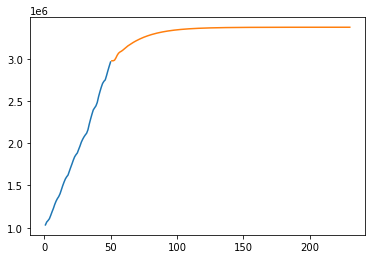

In [183]:
plt.plot(day_new,scaler.inverse_transform(df1[115:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

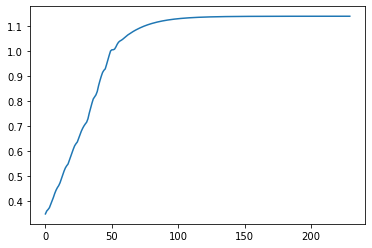

In [184]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[115:])

In [96]:
df3=scaler.inverse_transform(df3).tolist()

Text(0.5, 0, 'Days')

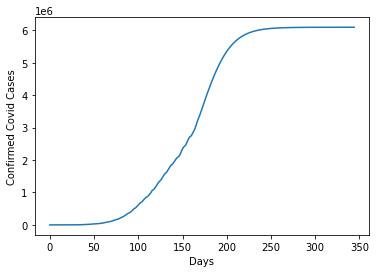

In [97]:
plt.plot(df3)
plt.ylabel("Confirmed Covid Cases")
plt.xlabel("Days")
